# DEPRESSION ANALYSIS

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/depression_data.csv")
df.head(5)

,Unnamed,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [ ]:
df['message'].iloc[:2]

0    just had a real good moment. i missssssssss hi...
1           is reading manga  http://plurk.com/p/mzp1e
Name: message, dtype: object

In [ ]:
df.columns

Index(['Unnamed', 'message', 'label'], dtype='object')

In [ ]:
df = df.drop('Unnamed',axis=1)

In [ ]:
df

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [ ]:
df.shape

(10314, 2)

### VISUALIZING THE DATA

<Axes: ylabel='count'>

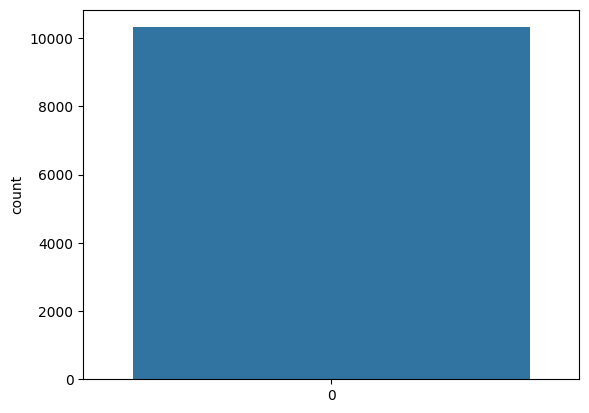

In [ ]:
sns.countplot(df['label'])

In [ ]:
import nltk
import re
nltk.download("omw-1.4")
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
corpus=[]
for i in range(0,len(df)):
    message = re.sub('[^a-zA-Z]',' ',df['message'][i])
    message = message.lower()
    message = message.split()
    message = [lemmatizer.lemmatize(word) for word in message ]
    message = ' '.join(message)
    corpus.append(message)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df['message'][3]

"@lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though. "

In [ ]:
corpus[3]

'lapcat need to send em to my accountant tomorrow oddly i wasn t even referring to my tax those are supporting evidence though'

### IMPORTING THE REQUIRED LIBRARIES FOR WORDS INITILIAZATION

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

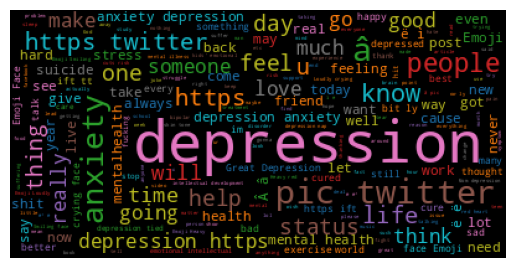

In [ ]:
Depressive_words = ' '.join(list(df[df['label'] == 1]['message']))
wordcloud_depressive = WordCloud( colormap="tab10").generate(Depressive_words)
plt.imshow(wordcloud_depressive)
plt.axis('off')
plt.show()

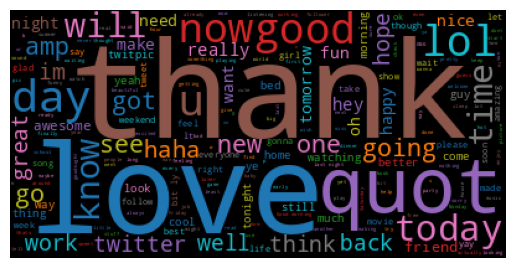

In [ ]:
Non_Depressive_words = ' '.join(list(df[df['label'] == 0]['message']))
wordcloud_non_depressive = WordCloud( colormap="tab10").generate(Non_Depressive_words)
plt.imshow(wordcloud_non_depressive)
plt.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(corpus,df['label'],test_size=0.10,random_state=0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( ngram_range=(1,3), stop_words='english',max_features=15000)
x_train_vect = vectorizer.fit_transform(x_train)
x_test_vect = vectorizer.transform(x_test)

In [ ]:
x_train_vect.shape

(9282, 15000)

In [ ]:
from imblearn import under_sampling
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
x_resample, y_resample = SMOTE().fit_resample(x_train_vect, y_train)
x_test_resample, y_test_resample = SMOTE().fit_resample(x_test_vect, y_test)
print(x_resample.shape)
print(y_resample.shape)
print(x_test_resample.shape)
print(y_test_resample.shape)


(14426, 15000)
(14426,)
(1574, 15000)
(1574,)


### APPLYING LOGISTIC REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(x_resample,y_resample)

LogisticRegression()

### CLASSIFICATION REPORT FOR CHECKING THE ACCURACY

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(x_test_resample)
accuracy_score(y_test_resample,y_pred)
print(classification_report(y_test_resample,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       787
           1       0.99      0.98      0.99       787

    accuracy                           0.99      1574
   macro avg       0.99      0.99      0.99      1574
weighted avg       0.99      0.99      0.99      1574



### FOR TAKING USER INPUT AND PREDICTION

In [ ]:
def preprocess(data):
    #preprocess
    a = re.sub('[^a-zA-Z]',' ',data)
    a = a.lower()
    a = a.split()
    a = [lemmatizer.lemmatize(word) for word in a ]
    a = ' '.join(a)
    return a

In [ ]:
import re
strr = input('Enter Your Message: ')
print("-------------------------------")
examples = strr

a = preprocess(examples)

example_counts = vectorizer.transform([a])
prediction =clf.predict(example_counts)
prediction[0]

if prediction[0]==0:
    print('Positive')
elif prediction[0]==1:
    print('Depressive')


Enter Your Message: i am done
-------------------------------
Positive


In [ ]:
import pickle
filename = 'vectorizer.pkl'
pickle.dump(vectorizer, open(filename, 'wb'))

In [ ]:
filename = 'prediction.pkl'
pickle.dump(clf, open(filename, 'wb'))